# GradientBoosting

In [1]:
import matplotlib
#np.warnings.filterwarnings('ignore')
from preprocessing import *
from aux import *
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier

sns.set()

df_data = pd.read_csv('https://drive.google.com/uc?export=download&id=1i-KJ2lSvM7OQH0Yd59bX01VoZcq8Sglq')
df_decision = pd.read_csv('https://drive.google.com/uc?export=download&id=1km-AEIMnWVGqMtK-W28n59hqS5Kufhd0')

## Preprocesado 1

In [2]:
columnillas = ['tipo_de_sala_4d', 'tipo_de_sala_normal', 'tipo_de_sala_nan', 'id_usuario', 'genero_mujer', 'genero_nan', 
              'edad', 'amigos', 'parientes', 'precio_ticket', 
              'nombre_sede_fiumark_palermo', 'nombre_sede_fiumark_quilmes', 'nombre_sede_nan', 
              'cant_acompañantes']

In [3]:
def preprocesado_1(dataset, columnas):
    df = eliminar_features_que_no_aportan_info(dataset, True)
    df = crear_feature_acompañantes(df)
    df = replace_nulls_column(df, 'edad', 'media')
    columnas_a_encodear = ['tipo_de_sala', 'genero', 'nombre_sede']
    df = encodear_atributos_categoricos(df, columnas_a_encodear)
    df = df.reindex(columns = columnas)
    return df

In [4]:
volver = ['volveria']
columnas = columnillas + volver

In [5]:
dataset = pd.merge(df_data, df_decision, how='inner', left_on='id_usuario', right_on='id_usuario')

df = preprocesado_1(dataset, columnas)

df.head()

,tipo_de_sala_4d,tipo_de_sala_normal,tipo_de_sala_nan,id_usuario,genero_mujer,genero_nan,edad,amigos,parientes,precio_ticket,nombre_sede_fiumark_palermo,nombre_sede_fiumark_quilmes,nombre_sede_nan,cant_acompañantes,volveria
0,1,0,0,117,0,0,73.5,0,0,1,0,1,0,0,0
1,1,0,0,658,1,0,35.0,1,1,2,0,1,0,2,0
2,0,1,0,794,0,0,32.7,0,0,3,0,0,0,0,0
3,1,0,0,455,0,0,32.7,0,0,1,1,0,0,0,0
4,1,0,0,173,1,0,4.0,1,1,2,1,0,0,2,1


In [6]:
df.shape

(801, 15)

## Entrenamiento

In [7]:
X, y = split_dataset_X_y(df, columnillas)

params = {'min_samples_split': np.arange(2, 16), 
          'max_depth': np.arange(1, 35),
          'n_estimators': np.arange(75, 125),
          'learning_rate': [0.1, 0.2, 0.4, 0.7],
          'criterion': ['friedman_mse', 'mse', 'mae'],
          'loss': ['deviance', 'exponential'],
         }

model_boosting = GradientBoostingClassifier(random_state=117)

best_params, X_train, X_test, y_train, y_test = fit_model_random_grid_search (X, y, model_boosting, params)

boosting = GradientBoostingClassifier(
    random_state=117,
    n_estimators = best_params['n_estimators'],
    min_samples_split = best_params['min_samples_split'],
    max_depth = best_params['max_depth'],
    loss = best_params['loss'],
    learning_rate = best_params['learning_rate'],
    criterion = best_params['criterion'],
)

boosting = apply_stratified_k_fold(X, y, boosting)

X.shape:  (801, 14)
y.shape:  (801,) 

Best score: 0.836427732079906
Best params {'n_estimators': 79, 'min_samples_split': 6, 'max_depth': 2, 'loss': 'deviance', 'learning_rate': 0.4, 'criterion': 'mse'}

Fold 0: AUC ROC score is 0.7458
Fold 1: AUC ROC score is 0.7779
Fold 2: AUC ROC score is 0.8398
Fold 3: AUC ROC score is 0.8171
Fold 4: AUC ROC score is 0.7928
Mean test AUC ROC is: 0.7947


## Métricas

In [8]:
scores = get_scores(boosting, X_test, y_test)

AUC ROC : 0.9623
Accuracy : 0.9154
Precision : 0.9545
Recall : 0.9758
F1-Score : 0.8811


### Matriz de confusión

/home/anarella/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


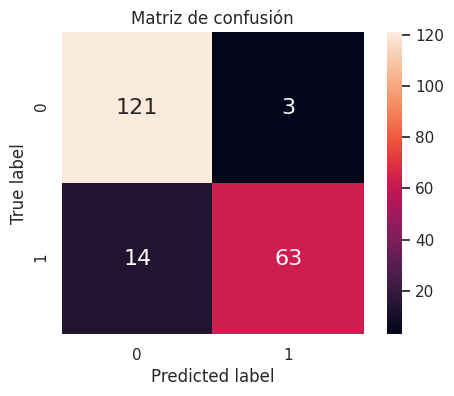

In [9]:
plot_confusion_matrix(y_test, boosting.predict(X_test))

## Test Holdout

In [10]:
holdout = pd.read_csv('https://drive.google.com/uc?export=download&id=1I980-_K9iOucJO26SG5_M8RELOQ5VB6A')

In [11]:
df_h = preprocesado_1(holdout, columnillas)
df_h.head()

,tipo_de_sala_4d,tipo_de_sala_normal,tipo_de_sala_nan,id_usuario,genero_mujer,genero_nan,edad,amigos,parientes,precio_ticket,nombre_sede_fiumark_palermo,nombre_sede_fiumark_quilmes,nombre_sede_nan,cant_acompañantes
0,1,0,0,650,1,0,26.0,0,0,1,1,0,0,0
1,1,0,0,234,1,0,8.0,4,2,4,1,0,0,6
2,0,1,0,31,0,0,43.0,0,0,3,0,0,0,0
3,0,0,0,552,0,0,30.0,0,0,3,1,0,0,0
4,1,0,0,411,0,0,32.8,0,0,1,1,0,0,0


In [12]:
df_resultado = evaluate_holdout(holdout, df_h, boosting)
df_resultado.head(15)

y_pred.shape:  (90,)
holdout_df.shape:  (90, 14) 



,id_usuario,volveria
0,650,0
1,234,0
2,31,1
3,552,0
4,411,0
5,134,1
6,497,1
7,434,0
8,528,0
9,112,1


In [13]:
df_resultado.to_csv('prediccion/Boosting_resultado_final.csv')

## Preprocesado 2

In [87]:
columnas_nuevas = ['tipo_de_sala_4d', 'tipo_de_sala_normal', 'tipo_de_sala_nan',
                   'id_usuario', 'genero_mujer', 'genero_nan', 
              'edad', 'fila_medio', 'fila_nan',
                   'parientes',
              'precio_ticket', 'cant_acompañantes',
              'nombre_sede_fiumark_palermo', 'nombre_sede_fiumark_quilmes', 'nombre_sede_nan']

In [92]:
def preprocesado_2(dataset, columnas):
    df = eliminar_features_que_no_aportan_info(dataset, False)
    df = crear_feature_acompañantes(df)
    df = eliminar_features(df,['amigos'])
    df = replace_nulls_column(df, 'edad', 'media')
    features_a_encodear = ['fila','nombre_sede','genero', 'tipo_de_sala']
    df = encodear_atributos_categoricos(df, features_a_encodear)
    df = df.reindex(columns = columnas)
    return df

In [93]:
columnas_2 = columnas_nuevas + volver

In [94]:
df_2 = preprocesado_2(dataset, columnas_2)

df_2.head()

,tipo_de_sala_4d,tipo_de_sala_normal,tipo_de_sala_nan,id_usuario,genero_mujer,genero_nan,edad,fila_medio,fila_nan,parientes,precio_ticket,cant_acompañantes,nombre_sede_fiumark_palermo,nombre_sede_fiumark_quilmes,nombre_sede_nan,volveria
0,1,0,0,117,0,0,73.5,0,1,0,1,0,0,1,0,0
1,1,0,0,658,1,0,35.0,0,1,1,2,2,0,1,0,0
2,0,1,0,794,0,0,32.7,0,1,0,3,0,0,0,0,0
3,1,0,0,455,0,0,32.7,0,1,0,1,0,1,0,0,0
4,1,0,0,173,1,0,4.0,0,1,1,2,2,1,0,0,1


In [95]:
df_2.shape

(801, 16)

# Entrenamiento

In [96]:
X_2, y_2 = split_dataset_X_y(df_2, columnas_nuevas)

model_boosting = GradientBoostingClassifier(random_state=117)

best_params_2, X_train_2, X_test_2, y_train_2, y_test_2 = fit_model_random_grid_search (X_2, y_2, model_boosting,
                                                                                        params)

boosting_2 = GradientBoostingClassifier(
    random_state=117,
    n_estimators = best_params_2['n_estimators'],
    min_samples_split = best_params_2['min_samples_split'],
    max_depth = best_params_2['max_depth'],
    loss = best_params_2['loss'],
    learning_rate = best_params_2['learning_rate'],
    criterion = best_params_2['criterion'],
)

boosting_2 = apply_stratified_k_fold(X_2, y_2, boosting_2)

X.shape:  (801, 15)
y.shape:  (801,) 

Best score: 0.862984723854289
Best params {'n_estimators': 112, 'min_samples_split': 4, 'max_depth': 1, 'loss': 'deviance', 'learning_rate': 0.1, 'criterion': 'friedman_mse'}

Fold 0: AUC ROC score is 0.7721
Fold 1: AUC ROC score is 0.7962
Fold 2: AUC ROC score is 0.8398
Fold 3: AUC ROC score is 0.7755
Fold 4: AUC ROC score is 0.7847
Mean test AUC ROC is: 0.7937


## Métricas

In [97]:
scores_2 = get_scores(boosting_2, X_test_2, y_test_2)

AUC ROC : 0.8791
Accuracy : 0.8209
Precision : 0.8475
Recall : 0.9274
F1-Score : 0.7353


### Matriz de confusión

/home/anarella/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


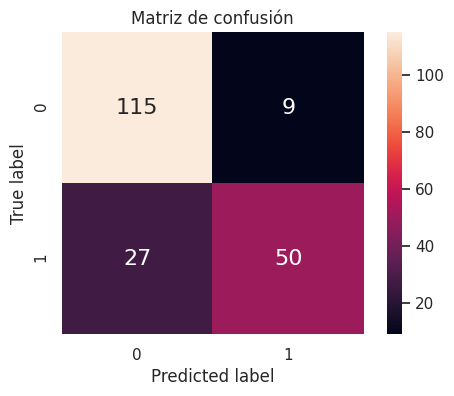

In [98]:
plot_confusion_matrix(y_test_2, boosting_2.predict(X_test_2))

## Test Holdout

In [99]:
df_h_2 = preprocesado_2(holdout, columnas_nuevas)
df_h_2.head()

,tipo_de_sala_4d,tipo_de_sala_normal,tipo_de_sala_nan,id_usuario,genero_mujer,genero_nan,edad,fila_medio,fila_nan,parientes,precio_ticket,cant_acompañantes,nombre_sede_fiumark_palermo,nombre_sede_fiumark_quilmes,nombre_sede_nan
0,1,0,0,650,1,0,26.0,0,1,0,1,0,1,0,0
1,1,0,0,234,1,0,8.0,0,1,2,4,6,1,0,0
2,0,1,0,31,0,0,43.0,0,1,0,3,0,0,0,0
3,0,0,0,552,0,0,30.0,0,1,0,3,0,1,0,0
4,1,0,0,411,0,0,32.8,0,1,0,1,0,1,0,0


In [100]:
df_resultado_2 = evaluate_holdout(holdout, df_h_2, boosting_2)
df_resultado_2.head(15)

y_pred.shape:  (90,)
holdout_df.shape:  (90, 15) 



,id_usuario,volveria
0,650,1
1,234,0
2,31,0
3,552,0
4,411,0
5,134,1
6,497,1
7,434,0
8,528,0
9,112,1


In [101]:
df_resultado_2.to_csv('prediccion/Boosting_2do_prepoc_resultado_final.csv')